# Project Description
In this project, we will apply data importing and cleaning skills to uncover insights about the Airbnb market in New York City.

we will import data from multiple file types and combine them to answer questions about the Airbnb market in New York. we will also use your string cleaning and date manipulation skills to extract accurate information from the datasets.

# 1. Import and prepare the Datasets
* In this notebook, we will take a look at the NYC Airbnb market by combining data from multiple file types like `.csv, .tsv, and .xlsx`.

* We will be working with three datasets:

1. "datasets/airbnb_price.csv"

2. "datasets/airbnb_room_type.xlsx"

3. "datasets/airbnb_last_review.tsv"


In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the datasets and store them in variables

# Load airbnb_price.csv
prices = pd.read_csv('datasets/airbnb_price.csv')
# Load airbnb_last_reviews.csv
reviews = pd.read_csv('datasets/airbnb_last_review.tsv', sep='\t')
# Load  the first sheet in airbnb_room_type.xlsx
room_types = pd.read_excel('datasets/airbnb_room_type.xlsx', sheet_name=0)

In [3]:
# print the first 5 rows of each dataset
print(prices.head())
print('='*50)
print(reviews.head())
print('='*50)
print(room_types.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown
   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019
   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  En

In [4]:
# print the shape of each dataset
print(prices.shape)
print(reviews.shape)
print(room_types.shape)

(25209, 3)
(25209, 3)
(25209, 3)


we have 3 datasets, each with the same number of rows but different columns , we need to merge them into one dataset
we will use the pandas merge function to merge the datasets. we will merge the prices and room_types datasets first
then we will merge the reviews dataset with the merged prices and room_types  dataset

In [5]:
# merge the three datasets into one

prices_and_rooms = prices.merge(room_types, how='outer' , on='listing_id')
airbnb_merged = prices_and_rooms.merge(reviews, how='outer', on='listing_id')

airbnb_merged.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


now we have a merged dataset, we can start exploring it and check if the data is clean or not

# Data Cleaning

In [6]:
# check the first five rows of the dataset
airbnb_merged.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


In [7]:
# check the data info 
print(airbnb_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB
None


as we can see, 
* the `last_review` column is an object, we need to convert it to datetime.
* also the `price` column is an object and each value followed by 'dollars' string, we need to convert it to float and convert it to numerical.
* the `nbhood_full` column contains borough and neighbourhood so we can split the column into two columns .


In [8]:
# convert last_review to datetime
airbnb_merged['last_review'] = pd.to_datetime(airbnb_merged['last_review'])

In [9]:
# remove string from price column and convert it to numeric
airbnb_merged['price'] = airbnb_merged['price'].str.replace('dollars', '')
airbnb_merged['price'] = pd.to_numeric(airbnb_merged['price'])

In [10]:
# split the nbhood_full column into two columns
airbnb_merged['borough'] = airbnb_merged['nbhood_full'].str.partition(',')[0]
airbnb_merged['neighbourhood'] = airbnb_merged['nbhood_full'].str.partition(',')[2]
# drop nbhood_full column
airbnb_merged.drop('nbhood_full', axis=1, inplace=True)

In [11]:
airbnb_merged.head()

,listing_id,price,description,room_type,host_name,last_review,borough,neighbourhood
0,2595,225,Skylit Midtown Castle,Entire home/apt,Jennifer,2019-05-21,Manhattan,Midtown
1,3831,89,Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019-07-05,Brooklyn,Clinton Hill
2,5099,200,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019-06-22,Manhattan,Murray Hill
3,5178,79,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24,Manhattan,Hell's Kitchen
4,5238,150,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019-06-09,Manhattan,Chinatown


In [12]:
# check room categories
airbnb_merged['room_type'].value_counts()

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

`room_type` column have same categories with different variations so to solve this problem we can lower case all values 

In [13]:
airbnb_merged['room_type'] = airbnb_merged['room_type'].str.lower()
# chaeck the values again
airbnb_merged['room_type'].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [14]:
# check missing values
airbnb_merged.isna().sum()

listing_id        0
price             0
description      10
room_type         0
host_name         8
last_review       0
borough           0
neighbourhood     0
dtype: int64

In [15]:
# drop missing values
airbnb_merged.dropna(inplace=True)

In [16]:
# check duplicate values
airbnb_merged.duplicated().any()

False

In [17]:
# check outliers in numerical columns , we have only the price column
airbnb_merged['price'].describe()

count    25191.000000
mean       141.816998
std        147.389669
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

* as we can see the price column min=0 and there are no rooms would be free
so we will remove rows with price =0
* also max price = 7500 althoug the third quartile = 175 , so the price column have outliers

In [18]:
# check how many rocords with zero price
airbnb_merged[airbnb_merged['price']== 0]

,listing_id,price,description,room_type,host_name,last_review,borough,neighbourhood
10861,20333471,0,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Anisha,2019-06-24,Bronx,East Morrisania
10958,20523843,0,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Martial Loft,2019-05-18,Brooklyn,Bushwick
11023,20639628,0,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,2019-06-15,Brooklyn,Bedford-Stuyvesant
11024,20639792,0,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,2019-06-21,Brooklyn,Bedford-Stuyvesant
11025,20639914,0,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,2019-06-23,Brooklyn,Bedford-Stuyvesant
11577,21291569,0,Coliving in Brooklyn! Modern design / Shared room,shared room,Sergii,2019-06-22,Brooklyn,Bushwick
11589,21304320,0,Best Coliving space ever! Shared room.,shared room,Sergii,2019-05-24,Brooklyn,Bushwick


In [19]:
# remove the listings with a price = 0 from the dataset
airbnb_merged = airbnb_merged[airbnb_merged['price'] != 0]

AxesSubplot(0.125,0.125;0.775x0.755)


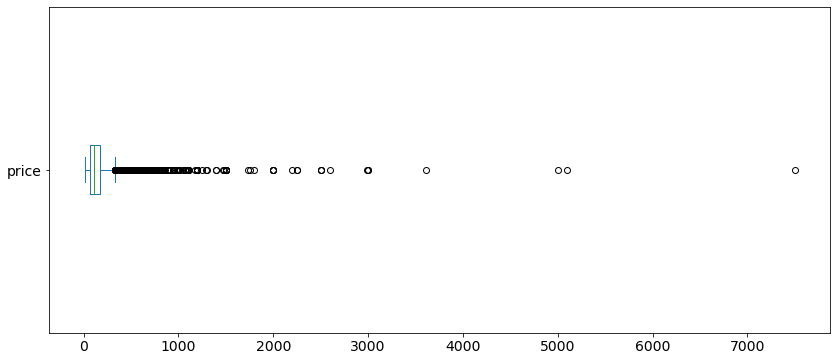

In [20]:
# check the distribution of the price column using a boxplot
print(airbnb_merged['price'].plot(kind='box', vert=False, figsize=(14,6), fontsize=14))

from the boxplot we can see that we have a lot of outliers in the price column , so we will remove them using the quantile method so we can keep the 99% of the data

In [21]:
upper_limit = airbnb_merged['price'].quantile(0.99)
lower_limit = airbnb_merged['price'].quantile(0.01)
# filter the data
airbnb_merged=airbnb_merged[(airbnb_merged['price'] >= lower_limit) & 
(airbnb_merged['price'] <= upper_limit)]
# check the data shape after filter
airbnb_merged.shape

(24730, 8)

# Data Analysis

### Average daily cost in airbnb listing

In [22]:
daily_average = round(airbnb_merged['price'].mean(),2)
print(f"the average price per night for airbnb is {daily_average} dollars")

the average price per night for airbnb is 133.9 dollars


In [23]:
# what is the average price per night for each borough?
borough_average = airbnb_merged.groupby('borough')['price'].mean().round(2)
print(borough_average)

borough
Bronx             81.58
Brooklyn         118.86
Manhattan        167.78
Queens            92.43
Staten Island     87.50
Name: price, dtype: float64


the highest average price per night is in Manhattan

#### Average monthly cost 

In [24]:
# add a new column `price_per_month` to the prices dataset
airbnb_merged['price_per_month'] = airbnb_merged['price'] * 365 / 12
# calculate the average price per month
monthly_average = round(airbnb_merged['price_per_month'].mean(),2)
print(f"the average price per month for airbnb is {monthly_average} dollars")

the average price per month for airbnb is 4072.66 dollars


In [25]:
# what is the average price per night for each borough?
borough_average_daily = airbnb_merged.groupby('borough')['price'].mean().round(2)
print(borough_average_daily)



borough
Bronx             81.58
Brooklyn         118.86
Manhattan        167.78
Queens            92.43
Staten Island     87.50
Name: price, dtype: float64


In [26]:
# average daily price per room type
room_type_average_daily = airbnb_merged.groupby('room_type')['price'].mean().round(2)
print(room_type_average_daily)

room_type
entire home/apt    183.08
private room        80.03
shared room         58.62
Name: price, dtype: float64


In [27]:
# check the average price per month for each borough
borough_price = airbnb_merged.groupby('borough')['price_per_month'].mean().reset_index()
borough_price.sort_values(by='price_per_month', ascending=False, inplace=True)
borough_price

,borough,price_per_month
2,Manhattan,5103.410976
1,Brooklyn,3615.442180
3,Queens,2811.388195
4,Staten Island,2661.516603
0,Bronx,2481.349873


<AxesSubplot:xlabel='borough', ylabel='price_per_month'>

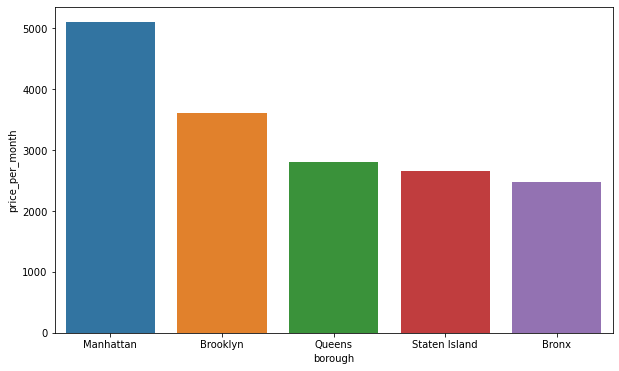

In [28]:
# plot the average price per month for each borough
plt.figure(figsize=(10,6))
sns.barplot(x='borough', y='price_per_month', data=borough_price)

### room type

In [29]:
# which room type is the most common airbnb in NYC ?
airbnb_merged['room_type'].value_counts().reset_index()    

,index,room_type
0,entire home/apt,13026
1,private room,11228
2,shared room,476


In [30]:
# what is the most common room type in each borough ?
borough_room_type = airbnb_merged.groupby(['borough', 'room_type'])['listing_id'].count().reset_index()
borough_room_type.sort_values(by='listing_id', ascending=False, inplace=True)
borough_room_type

,borough,room_type,listing_id
6,Manhattan,entire home/apt,5986
3,Brooklyn,entire home/apt,5320
4,Brooklyn,private room,4854
7,Manhattan,private room,3873
10,Queens,private room,1989
9,Queens,entire home/apt,1328
1,Bronx,private room,385
0,Bronx,entire home/apt,259
8,Manhattan,shared room,246
12,Staten Island,entire home/apt,133


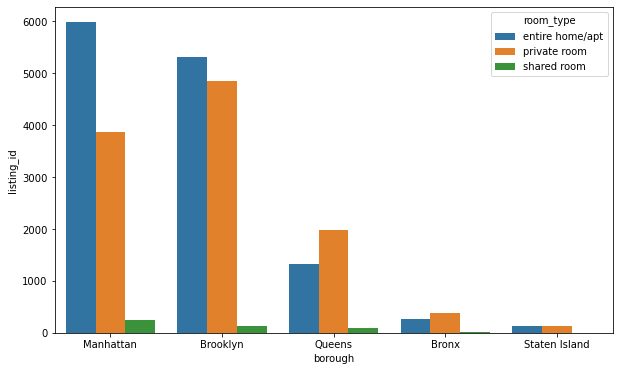

In [31]:
# plot the most common room type in each borough using a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='borough', y='listing_id', hue='room_type', data=borough_room_type);

the most common room type in Manhattan and Brooklyn is Entire home or apartment while in Queens and Bronx is Private room

In [32]:
# what is average daily price per room type ?
airbnb_merged.groupby('room_type')['price'].mean().sort_values(ascending=False)

room_type
entire home/apt    183.077998
private room        80.029035
shared room         58.621849
Name: price, dtype: float64

In [33]:
# what is the average daily price per room type in each borough ?
borough_room_type_price = airbnb_merged.groupby(['borough', 'room_type'])['price'].mean().reset_index()
borough_room_type_price.sort_values(by='price', ascending=False, inplace=True)
borough_room_type_price


,borough,room_type,price
6,Manhattan,entire home/apt,213.781824
3,Brooklyn,entire home/apt,164.308835
9,Queens,entire home/apt,139.090361
0,Bronx,entire home/apt,118.571429
12,Staten Island,entire home/apt,116.774436
7,Manhattan,private room,102.852569
4,Brooklyn,private room,71.030490
8,Manhattan,shared room,70.752033
10,Queens,private room,63.325289
1,Bronx,private room,57.675325


<AxesSubplot:xlabel='borough', ylabel='price'>

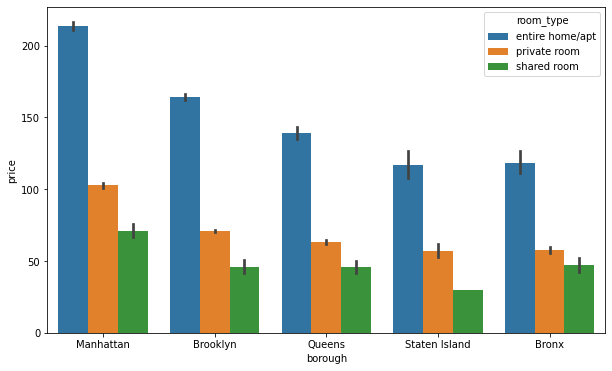

In [34]:
# plot the average price per month for each borough
plt.figure(figsize=(10,6))
sns.barplot(x='borough', y='price', hue='room_type', data=airbnb_merged)

In [35]:
# last review distribution
print(airbnb_merged['last_review'].min())
print(airbnb_merged['last_review'].max())

2019-01-01 00:00:00
2019-07-09 00:00:00


In [36]:
# extract the month from last_review column
airbnb_merged['month'] = airbnb_merged['last_review'].dt.month

<AxesSubplot:xlabel='month', ylabel='count'>

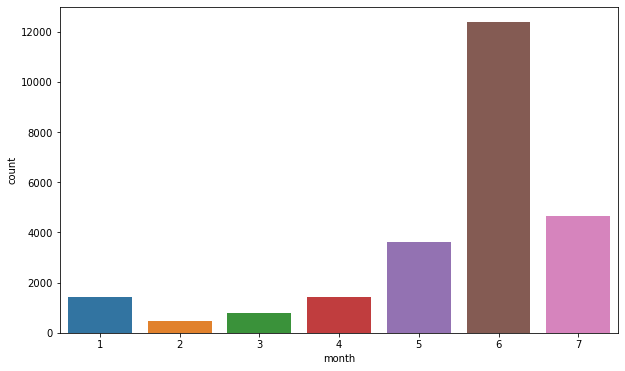

In [37]:
# plot the number of listings per month
plt.figure(figsize=(10,6))
sns.countplot(x='month', data=airbnb_merged)

### conclusion: 
* in the period from 2019-01-01  to 2020-07-09  there were 24730 airbnb listings in NYC.
* The average price per night for airbnb in NYC is 169.44 dollars while The average price per month is 4072.67 dollars.
* The Most expensive borough is Manhattan with an average price per month of 5103.41 dollars, while the cheapest borough is Bronx with an average price per month of 2481.34 dollars.
* in general the most common room type in Airbnb NYC listings is Entire home/apt. 
* in Manhattan and Brooklyn the most common room type is Entire home/apt, while in Bronx, Queens and Staten Island the most common room type is Private room.

* The average daily price for Entire home/apt is 183 dollars, while the average daily price for Private room is 80 dollars, 
and the average daily price for Shared room is 50 dollars.

* in Manhattan the average daily price for Entire home/apt is 213.78 dollars, and Private room is 102.85 dollars.
* in Brooklyn the average daily price for Entire home/apt is 164.3 dollars, and  Private room is 71 dollars.
* in Queens the average daily price for Entire home/apt is 139 dollars, and  Private room is 63 dollars.


* The most common month for airbnb listings is June with 12378 listings, while the least common month is Feb with 452 listings.


